#### Copyright 2019 Google LLC.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# WIP Deep Neural Networks in Tensorflow

For this exercise we will train a deep neural network to interpret sign language from images of hands forming sign language shapes.

The [dataset](https://www.kaggle.com/datamunge/sign-language-mnist) contains images of sign language symbols. The 'j' and 'z' are not included in the dataset since the require not just a hand form, but also a motion.

## Overview

### Learning Objectives

  * Use TensorFlow to implement artificial neural network
  * Use DNNClassifier to implement deep neural network classifier

### Prerequisites

* Intermediate Python
* Intermediate Pandas
* Introduction to TensorFlow

### Estimated Duration

60 minutes

### Grading Criteria

Each exercise is worth 3 points. The rubric for calculating those points is:

| Points | Description |
|--------|-------------|
| 0      | No attempt at exercise |
| 1      | Attempted exercise, but code does not run |
| 2      | Attempted exercise, code runs, but produces incorrect answer |
| 3      | Exercise completed successfully |

There is no graded exercises in this Colab so there is 0 points available.

## Acquire the Data

Load the zipped sign language data into your Colab. The file should be named 'sign-language-mnist.zip'.

After the file is uploaded, you can unzip the file.

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('sign-language-mnist.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()

The unzipped data contains many different files. There is an overview image of American Sign Language (ASL), a few example images, and two CSV files. The dataset is already split into testing and training data.

## Load and Examine the Training Data

Let's load the data and describe it. As we can see there are 27,455 rows of data. Each row starts with a label signifying the letter in the image and 784 pixel that contain the data for a 28x28 image.

The label contains values 0.0 through 24.0 and the pixels contain data between 0.0 and 255.0.

In [3]:
import pandas as pd

train_df = pd.read_csv('./sign-language-mnist/sign_mnist_train.csv')

train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


Let's take a look at the distribution of the letters.

In [4]:
train_df.groupby('label')['label'].count()

label
0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64

We can see that letter 9, j, and letter 25, z, are missing as we expected. There seems to be a relatively even number of training samples for each letter.

Just to get an idea of the images that we are working with, let's take a look at a sample.

In [5]:
import matplotlib.pyplot as plt

image_to_view = 100

plt.imshow(
  train_df.iloc[image_to_view][train_df.columns.values[1:]].values.reshape(28,28),
  cmap='gray')
plt.show()

<Figure size 640x480 with 1 Axes>

## Load and Examine the Test Data

Now we can load the test data and describe it. We can see that there are 7,172 test records, which is roughly a 20% sample.

In [6]:
test_df = pd.read_csv('./sign-language-mnist/sign_mnist_test.csv')

test_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


Let's see the distribution of the labels in the test data. The test labels are also pretty easily distributed.

In [7]:
test_df.groupby('label')['label'].count()

label
0     331
1     432
2     310
3     245
4     498
5     247
6     348
7     436
8     288
10    331
11    209
12    394
13    291
14    246
15    347
16    164
17    144
18    246
19    248
20    266
21    346
22    206
23    267
24    332
Name: label, dtype: int64

## Data Preparation

We since our pixel values range from 0 through 255, their values might not work well in a neural network. It is best to scale down the data if possible. For this pixel data scaling is as easy as dividing by 255. We should also convert our label to an integer value.

In [8]:
train_df[train_df.columns.values[0]] = train_df[train_df.columns.values[0]].astype(int)
train_df[train_df.columns.values[1:]] = train_df[train_df.columns.values[1:]]/255.0
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,0.570272,0.582354,0.593128,0.602143,0.612592,0.621221,0.629303,0.636626,0.642960,...,0.553352,0.578414,0.601278,0.624021,0.635174,0.638183,0.638848,0.635163,0.631913,0.626764
std,7.287552,0.162190,0.156636,0.153162,0.151354,0.145534,0.141669,0.137319,0.132008,0.128046,...,0.250005,0.256913,0.252657,0.249837,0.249954,0.248800,0.249056,0.248230,0.249453,0.252537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.474510,0.494118,0.509804,0.521569,0.537255,0.549020,0.556863,0.564706,0.572549,...,0.360784,0.376471,0.403922,0.439216,0.470588,0.490196,0.501961,0.501961,0.501961,0.492157
50%,13.000000,0.588235,0.600000,0.611765,0.619608,0.627451,0.635294,0.643137,0.647059,0.650980,...,0.564706,0.635294,0.674510,0.705882,0.717647,0.721569,0.721569,0.713725,0.713725,0.713725
75%,19.000000,0.682353,0.690196,0.698039,0.701961,0.709804,0.713725,0.717647,0.721569,0.725490,...,0.768627,0.792157,0.803922,0.811765,0.815686,0.811765,0.811765,0.807843,0.800000,0.800000
max,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We need to scale and type the test data too.

In [9]:
test_df[test_df.columns.values[0]] = test_df[test_df.columns.values[0]].astype(int)
test_df[test_df.columns.values[1:]] = test_df[test_df.columns.values[1:]]/255.0
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,0.584314,0.584314,0.588235,0.588235,0.588235,0.592157,0.592157,0.588235,0.592157,...,0.541176,0.580392,0.498039,0.349020,0.321569,0.376471,0.415686,0.439216,0.470588,0.419608
1,5,0.494118,0.501961,0.513725,0.517647,0.521569,0.525490,0.529412,0.529412,0.533333,...,0.184314,0.407843,0.760784,0.717647,0.729412,0.721569,0.721569,0.721569,0.713725,0.705882
2,10,0.333333,0.345098,0.360784,0.376471,0.411765,0.482353,0.529412,0.560784,0.576471,...,0.266667,0.650980,0.949020,0.890196,0.901961,0.890196,0.886275,0.882353,0.878431,0.870588
3,0,0.796078,0.803922,0.811765,0.807843,0.811765,0.819608,0.823529,0.819608,0.823529,...,0.603922,0.972549,0.968627,0.972549,0.992157,0.925490,0.901961,0.941176,0.992157,1.000000
4,3,0.737255,0.749020,0.756863,0.764706,0.780392,0.788235,0.792157,0.796078,0.796078,...,0.101961,0.156863,0.250980,0.188235,0.113725,0.180392,0.192157,0.180392,0.180392,0.207843


## Build and Train the Model

We now have some data ready to train and test our model. Let's begin by creating feature columns.

In [10]:
from tensorflow.feature_column import numeric_column

pixel_features = []

for column_name in train_df.columns[1:]:
  pixel_features.append(numeric_column(column_name))

len(pixel_features)

784

Creating a deep neural network classifier is as simple as creating an instance of a `DNNClassifier` class, declaring the number of classes, and choosing the number of hidden units.

In [11]:
from tensorflow.estimator import DNNClassifier

classifier = DNNClassifier(feature_columns=pixel_features, hidden_units=[392, 196], n_classes=26)

W0809 19:47:56.113234 4399982016 deprecation_wrapper.py:119] From /Users/dorishuang/anaconda3/lib/python3.6/site-packages/tensorflow_estimator/python/estimator/api/_v1/estimator/__init__.py:10: The name tf.estimator.inputs is deprecated. Please use tf.compat.v1.estimator.inputs instead.

W0809 19:47:56.118554 4399982016 estimator.py:1811] Using temporary folder as model directory: /var/folders/0n/ctf3gvvx57z27lg3_l0nbxzh0000gn/T/tmpip5rj4pb


We can now create an input function to feed the data to the model for training. The input function will create a dataset containing the feature and label columns. We'll shuffle the dataset, process it in batches, and repeat it.

In [12]:
import tensorflow as tf

from tensorflow.data import Dataset

def training_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = train_df[column_name]
 
  labels = train_df['label']

  training_ds = Dataset.from_tensor_slices((features, labels))
  training_ds = training_ds.shuffle(buffer_size=10000)
  training_ds = training_ds.batch(100)
  training_ds = training_ds.repeat(5)

  return training_ds

classifier.train(training_input)

W0809 19:47:56.182598 4399982016 deprecation.py:323] From /Users/dorishuang/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0809 19:47:57.483646 4399982016 deprecation.py:506] From /Users/dorishuang/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0809 19:48:05.732556 4399982016 deprecation.py:323] From /Users/dorishuang/anaconda3/lib/python3.6/site-packages/tensorflow_estimator/python/estimator/cann

## Test the Model

We can now create an input function to feed our testing data into the model to make predictions. We'll use the model to make predictions and save them in a list.

In [13]:
def testing_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = test_df[column_name]
  return Dataset.from_tensor_slices((features)).batch(1)

predictions = list(classifier.predict(testing_input))

W0809 19:51:36.899626 4399982016 deprecation.py:323] From /Users/dorishuang/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


We can now take a look at one of the predictions to see what it looks like.

In [14]:
predictions[0]

{'logits': array([-5.3247657 , -0.22277446,  6.4307466 ,  1.3473305 , -1.4315459 ,
         4.321315  ,  7.0797324 ,  5.812578  , -0.65925705, -8.193851  ,
        -2.0875006 ,  4.2587843 , -1.1879572 ,  0.5829033 ,  5.2417927 ,
         4.1937866 ,  5.2754326 , -3.0953314 , -1.3317766 ,  6.183665  ,
        -0.42120564,  0.8082066 , -0.62047833,  4.3846464 ,  1.4311657 ,
        -8.370553  ], dtype=float32),
 'probabilities': array([1.4666829e-06, 2.4104762e-04, 1.8693487e-01, 1.1587528e-03,
        7.1968119e-05, 2.2676485e-02, 3.5771841e-01, 1.0074493e-01,
        1.5579048e-04, 8.3235363e-08, 3.7347610e-05, 2.1301936e-02,
        9.1818300e-05, 5.3951592e-04, 5.6929085e-02, 1.9961398e-02,
        5.8876749e-02, 1.3632236e-05, 7.9518744e-05, 1.4601049e-01,
        1.9766297e-04, 6.7585293e-04, 1.6195052e-04, 2.4159074e-02,
        1.2600853e-03, 6.9753789e-08], dtype=float32),
 'class_ids': array([6]),
 'classes': array([b'6'], dtype=object),
 'all_class_ids': array([ 0,  1,  2,  3,

We see the predicted class. We can also see the logits and probabilities for the class.

Let's look at the actual label for our first bit of test data:

In [15]:
test_df.iloc[0]['label']

6.0

We can also see if the image looks like the symbol we predicted.

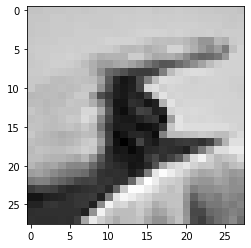

In [16]:
import matplotlib.pyplot as plt

image_to_view = 0

plt.imshow(
  test_df.iloc[image_to_view][test_df.columns.values[1:]].values.reshape(28,28),
  cmap='gray')
plt.show()

We should now extract all of the class IDs from our predictions and calculate precision and recall.

First, we'll extract all of the class IDs into a list.

In [17]:
predicted_classes = [p['class_ids'][0] for p in predictions]
predicted_classes

[6,
 24,
 10,
 0,
 20,
 21,
 20,
 14,
 20,
 5,
 20,
 20,
 17,
 0,
 19,
 4,
 10,
 13,
 5,
 1,
 2,
 0,
 21,
 13,
 17,
 15,
 5,
 15,
 5,
 10,
 15,
 13,
 18,
 19,
 21,
 17,
 18,
 21,
 0,
 14,
 16,
 17,
 20,
 15,
 14,
 24,
 24,
 0,
 11,
 18,
 8,
 20,
 17,
 19,
 16,
 16,
 21,
 0,
 6,
 20,
 10,
 18,
 11,
 20,
 2,
 20,
 10,
 0,
 0,
 0,
 21,
 2,
 16,
 4,
 20,
 17,
 15,
 11,
 2,
 16,
 17,
 2,
 16,
 15,
 5,
 21,
 0,
 11,
 8,
 13,
 2,
 1,
 5,
 6,
 13,
 21,
 0,
 0,
 11,
 21,
 1,
 0,
 2,
 20,
 16,
 1,
 15,
 14,
 19,
 2,
 0,
 21,
 0,
 5,
 2,
 11,
 16,
 5,
 0,
 20,
 0,
 13,
 18,
 13,
 0,
 20,
 6,
 15,
 18,
 15,
 19,
 5,
 2,
 10,
 5,
 24,
 13,
 15,
 20,
 21,
 15,
 13,
 5,
 24,
 21,
 11,
 18,
 11,
 17,
 21,
 0,
 11,
 10,
 11,
 14,
 18,
 2,
 10,
 6,
 24,
 14,
 11,
 18,
 18,
 16,
 20,
 18,
 21,
 6,
 20,
 14,
 16,
 13,
 15,
 10,
 10,
 0,
 5,
 17,
 1,
 0,
 16,
 10,
 1,
 2,
 5,
 18,
 5,
 1,
 0,
 5,
 5,
 0,
 15,
 0,
 15,
 13,
 5,
 19,
 10,
 5,
 11,
 1,
 10,
 20,
 0,
 1,
 17,
 17,
 14,
 17,
 5,
 14,
 18,
 13,


We can now calculate the F1 score.

In [18]:
from sklearn.metrics import f1_score

f1_score(test_df['label'], predicted_classes, average='micro')

0.29545454545454547

# Exercises

## Exercise 1: Challenge (Ungraded)

The F1 score for this model is pretty poor. Check out the [documentation for the DNNClassifier](https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier) and see what parameters you can change.

Experiment with different numbers and widths of hidden layers. Consider trying different optimizers and activation functions.

Record the parameters that you set and your F1 score for those parameters below.

Try to get an F1 above 0.5.

### Student Solution

In [ ]:
### Run 1
# Batch Size: 100
# Data Set Repeats: 5
# Layers: [392, 196]
# Activation Function: relu
# Loss Reduction: losses.Reduction.SUM
# Optimizer: Adagrad
# F1 Score: 0.12325711098717233

from tensorflow.estimator import DNNClassifier
from tensorflow import losses
classifier = DNNClassifier(feature_columns=pixel_features, hidden_units=[392, 196],
                           n_classes=26,activation_fn=tf.nn.relu,optimizer='Adagrad', loss_reduction=losses.Reduction.SUM,)

import tensorflow as tf
from tensorflow.data import Dataset
def training_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = train_df[column_name]
 
  labels = train_df['label']
  training_ds = Dataset.from_tensor_slices((features, labels))
  training_ds = training_ds.shuffle(buffer_size=10000)
  training_ds = training_ds.batch(100)
  training_ds = training_ds.repeat(5)
  return training_ds

classifier.train(training_input)

def testing_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = test_df[column_name]
  return Dataset.from_tensor_slices((features)).batch(1)

predictions = list(classifier.predict(testing_input))

predicted_classes = [p['class_ids'][0] for p in predictions]

from sklearn.metrics import f1_score
f1_score(test_df['label'], predicted_classes, average='micro')



In [ ]:
### Run 2
# Batch Size: 200
# Data Set Repeats: 10
# Layers: [392,392,196]
# Activation Function: sigmoid
# Loss Reduction: SUM
# Optimizer: GradientDescentOptimizer
# F1 Score: 0.037228109313998885

# ...
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from tensorflow import losses

classifier = DNNClassifier(feature_columns=pixel_features, hidden_units=[392, 392,196],
                           n_classes=26,activation_fn=tf.nn.sigmoid,
                           optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.3), loss_reduction=losses.Reduction.SUM,)


from tensorflow.data import Dataset
def training_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = train_df[column_name]
 
  labels = train_df['label']
  training_ds = Dataset.from_tensor_slices((features, labels))
  training_ds = training_ds.shuffle(buffer_size=10000)
  training_ds = training_ds.batch(200)
  training_ds = training_ds.repeat(10)
  return training_ds

classifier.train(training_input)


def testing_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = test_df[column_name]
  return Dataset.from_tensor_slices((features)).batch(1)

predictions = list(classifier.predict(testing_input))

predicted_classes = [p['class_ids'][0] for p in predictions]

from sklearn.metrics import f1_score
f1_score(test_df['label'], predicted_classes, average='micro')



In [ ]:
### Run 3
# Batch Size: 100
# Data Set Repeats: 10
# Layers: [196,52]
# Activation Function: sigmoid
# Loss Reduction: SUM
# Optimizer: GradientDescentOptimizer
# F1 Score: 0.15630228667038484

# ...
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from tensorflow import losses

classifier = DNNClassifier(feature_columns=pixel_features, hidden_units=[196,52],
                           n_classes=26,activation_fn=tf.nn.sigmoid,
                           optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.03), loss_reduction=losses.Reduction.SUM_OVER_BATCH_SIZE,)


from tensorflow.data import Dataset
def training_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = train_df[column_name]
 
  labels = train_df['label']
  training_ds = Dataset.from_tensor_slices((features, labels))
  training_ds = training_ds.shuffle(buffer_size=10000)
  training_ds = training_ds.batch(100)
  training_ds = training_ds.repeat(10)
  return training_ds

classifier.train(training_input)

def testing_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = test_df[column_name]
  return Dataset.from_tensor_slices((features)).batch(1)

predictions = list(classifier.predict(testing_input))

predicted_classes = [p['class_ids'][0] for p in predictions]

from sklearn.metrics import f1_score
f1_score(test_df['label'], predicted_classes, average='micro')



In [ ]:
### Run 4
# Batch Size: 200
# Data Set Repeats: 10
# Layers: [392,392,196]
# Activation Function: sigmoid
# Loss Reduction: SUM
# Optimizer: RMSPropOptimizer learning_rate=0.01
# F1 Score: 0.48884551031790296

# ...
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from tensorflow import losses

classifier = DNNClassifier(feature_columns=pixel_features, hidden_units=[392, 392],
                           n_classes=26,activation_fn=tf.nn.sigmoid,
                           optimizer=tf.train.RMSPropOptimizer(learning_rate=0.01), loss_reduction=losses.Reduction.SUM,)


from tensorflow.data import Dataset
def training_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = train_df[column_name]
 
  labels = train_df['label']
  training_ds = Dataset.from_tensor_slices((features, labels))
  training_ds = training_ds.shuffle(buffer_size=10000)
  training_ds = training_ds.batch(200)
  training_ds = training_ds.repeat(10)
  return training_ds

classifier.train(training_input)


def testing_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = test_df[column_name]
  return Dataset.from_tensor_slices((features)).batch(1)

predictions = list(classifier.predict(testing_input))

predicted_classes = [p['class_ids'][0] for p in predictions]

from sklearn.metrics import f1_score
f1_score(test_df['label'], predicted_classes, average='micro')


In [ ]:
### Run 5
# Batch Size: 250
# Data Set Repeats: 10
# Layers: [392,392]
# Activation Function: sigmoid
# Loss Reduction: SUM
# Optimizer: RMSPropOptimizer learning_rate=0.001
# F1 Score: 0.6429168990518683

# ...
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from tensorflow import losses

classifier = DNNClassifier(feature_columns=pixel_features, hidden_units=[392, 392],
                           n_classes=26,activation_fn=tf.nn.sigmoid,
                           optimizer=tf.train.RMSPropOptimizer(learning_rate=0.001), loss_reduction=losses.Reduction.SUM,)


from tensorflow.data import Dataset
def training_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = train_df[column_name]
 
  labels = train_df['label']
  training_ds = Dataset.from_tensor_slices((features, labels))
  training_ds = training_ds.shuffle(buffer_size=10000)
  training_ds = training_ds.batch(250)
  training_ds = training_ds.repeat(10)
  return training_ds

classifier.train(training_input)

def testing_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = test_df[column_name]
  return Dataset.from_tensor_slices((features)).batch(1)

predictions = list(classifier.predict(testing_input))

predicted_classes = [p['class_ids'][0] for p in predictions]

from sklearn.metrics import f1_score
f1_score(test_df['label'], predicted_classes, average='micro')


In [ ]:
### Run 6
# Batch Size: 250
# Data Set Repeats: 10
# Layers: [392,392]
# Activation Function: sigmoid
# Loss Reduction: SUM
# Optimizer: tf.train.AdamOptimizer learning_rate=0.001
# F1 Score: 0.6985499163413273

# ...
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from tensorflow import losses

classifier = DNNClassifier(feature_columns=pixel_features, hidden_units=[392, 392],
                           n_classes=26,activation_fn=tf.nn.sigmoid,
                           optimizer=tf.train.AdamOptimizer(learning_rate=0.001), loss_reduction=losses.Reduction.SUM,)


from tensorflow.data import Dataset
def training_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = train_df[column_name]
 
  labels = train_df['label']
  training_ds = Dataset.from_tensor_slices((features, labels))
  training_ds = training_ds.shuffle(buffer_size=10000)
  training_ds = training_ds.batch(250)
  training_ds = training_ds.repeat(10)
  return training_ds

classifier.train(training_input)

def testing_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = test_df[column_name]
  return Dataset.from_tensor_slices((features)).batch(1)

predictions = list(classifier.predict(testing_input))

predicted_classes = [p['class_ids'][0] for p in predictions]

from sklearn.metrics import f1_score
f1_score(test_df['label'], predicted_classes, average='micro')

In [ ]:
### Run 7
# Batch Size: 250
# Data Set Repeats: 10
# Layers: [392,392]
# Activation Function: leaky_relu
# Loss Reduction: SUM
# Optimizer: tf.train.AdamOptimizer learning_rate=0.001
# F1 Score: 0.7849972113775795

# ...
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from tensorflow import losses

classifier = DNNClassifier(feature_columns=pixel_features, hidden_units=[392, 392],
                           n_classes=26,activation_fn=tf.nn.leaky_relu,
                           optimizer=tf.train.AdamOptimizer(learning_rate=0.001), loss_reduction=losses.Reduction.SUM,)


from tensorflow.data import Dataset
def training_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = train_df[column_name]
 
  labels = train_df['label']
  training_ds = Dataset.from_tensor_slices((features, labels))
  training_ds = training_ds.shuffle(buffer_size=10000)
  training_ds = training_ds.batch(250)
  training_ds = training_ds.repeat(10)
  return training_ds

classifier.train(training_input)

def testing_input():
  features = {}
  for i in range(1, len(pixel_features)+1):
    column_name = 'pixel'+str(i)
    features[column_name] = test_df[column_name]
  return Dataset.from_tensor_slices((features)).batch(1)

predictions = list(classifier.predict(testing_input))

predicted_classes = [p['class_ids'][0] for p in predictions]

from sklearn.metrics import f1_score
f1_score(test_df['label'], predicted_classes, average='micro')